Epoch 0: Cost = 0.6931471805599453
Epoch 100: Cost = 0.4180074833491704
Epoch 200: Cost = 0.40485724567336956
Epoch 300: Cost = 0.40264825921785047
Epoch 400: Cost = 0.4021311644811848
Epoch 500: Cost = 0.40197808395743073
Epoch 600: Cost = 0.4019187112673292
Epoch 700: Cost = 0.40188824929728056
Epoch 800: Cost = 0.40186912916084727
Epoch 900: Cost = 0.40185580337384014
Accuracy:  81.15739099610067


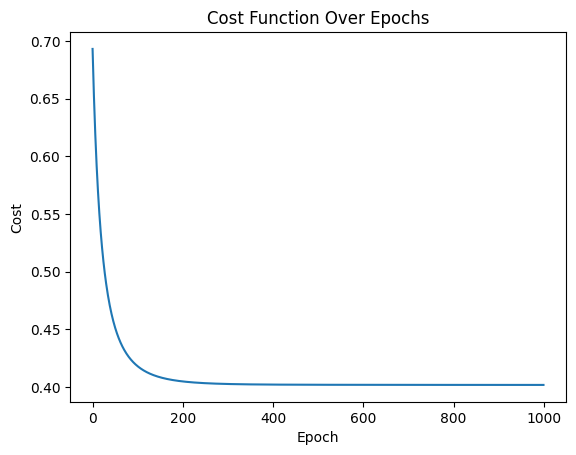

In [5]:
import random as rand
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('C:\\Users\\SOURI\\Desktop\\Robomanipal\\weatherAUS.csv')
# data = pd.read_csv('C:\\Users\\SOURI\\Desktop\\Robomanipal\\dummy.csv')
# data.describe()
# test_data = pd.read_csv('weatherAUS.csv')
data.dropna(inplace=True)
X = data[['MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine','RainToday']]
X["RainToday"].dtype
X["RainToday"]=(X["RainToday"].replace("Yes",1)).replace("No",0)

# X=X.fillna(X.mean())
# X_test = test_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','RainToday']]
# X1 = data[['MinTemp']]
# X2 = data[['MaxTemp']]
# X3 = data[['Evaporation']]
# X3.fillna(X3.mean())
# X4 = data[['Sunshine']]
# X4.fillna(X4.mean())
# X5 = data[['RainToday']]
# X5["RainToday"].dtype
# X5["RainToday"]=(X5["RainToday"].replace("Yes",1)).replace("No",0)
Y= data[['RainTomorrow']]
Y["RainTomorrow"].dtype
Y["RainTomorrow"]=(Y["RainTomorrow"].replace("Yes",1)).replace("No",0)
# Y_test = test_data[['RainTomorrow']]
# Y_test["RainTomorrow"].dtype
# Y_test["RainTomorrow"]=(Y_test["RainTomorrow"].replace("Yes",1)).replace("No",0)
# iX1 = 'MinTemp'
# iX2 = 'MaxTemp'
# iX3 = 'Evaporation'
# iX4 = 'Sunshine'
# iX5 = 'RainToday'


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def cost_function(y, y_pred):
    m = len(y)
    cost = (-1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost


def logistic_regression(X, Y, learning_rate, iterations):
    m, n = X.shape
    coefficients = np.zeros((n,1))
    cost_history = []


    for iteration in range(iterations):
        z = X @ coefficients
        predictions = sigmoid(z)
        gradient = (1/ m) * (X.T @ (predictions - Y))
        coefficients -= learning_rate * gradient
        cost = cost_function(Y, predictions)
        cost_history.append(cost)

        if iteration % 100 == 0:
            print(f"Epoch {iteration}: Cost = {cost}")

    return coefficients, cost_history
+

def predict(X, coefficients, threshold=0.5):
    return sigmoid(X @ coefficients) >= threshold


def accuracy(y_true, y_pred):
    return (np.mean(y_true == y_pred))*100


def PLOT(X,Y):
    X = (X - X.mean()) / X.std()
    X.insert(0, "intercept", np.ones(len(X)))

    X = X.values
    Y = Y.values

    learning_rate = 0.1
    iterations = 1000

    coefficients, cost_history = logistic_regression(X, Y, learning_rate, iterations)

    predictions = predict(X, coefficients)

    # if n > 1:
    print("Accuracy: ", accuracy(Y, predictions))
    plt.plot(range(iterations), cost_history)
    plt.title("Cost Function Over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()

    # if n == 1:
    #     num = rand.randrange(577)
    #     sample_data = X[num]
    #     actual_pred = Y[num]
    #     pred=predict(sample_data, coefficients)
    #     print(f"Predictions of {iX}: {pred} , Actual Value:{actual_pred}")
    #     print("Accuracy: ", accuracy([actual_pred], [pred]))
        


PLOT(X,Y)
# PLOT(X1, iX1, Y, len(X1.columns))
# PLOT(X2, iX2, Y, len(X2.columns))
# PLOT(X3, iX3, Y, len(X3.columns))
# PLOT(X4, iX4, Y, len(X4.columns))
# PLOT(X5, iX5, Y, len(X5.columns))
